<a href="https://colab.research.google.com/github/hiroca/Prog2kakusin/blob/main/wirk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

画像処理について

In [12]:
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2024-01-18 13:12:10--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 142.251.167.138, 142.251.167.113, 142.251.167.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download [following]
--2024-01-18 13:12:10--  https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391994 (383K) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>] 382.81K  --.-KB/s 

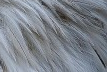

,name
0,canal.jpg
1,desert.jpg
2,dog.jpg
3,eagle.jpg
4,flower.jpg
5,green_pepper.jpg
6,tomato01.jpg
7,fox.jpg
8,ichidai.jpg
9,library.jpg


In [31]:
import numpy as np
import pandas as pd
import cv2, sys
import random
from google.colab.patches import cv2_imshow
jpgs=["canal.jpg","desert.jpg","dog.jpg","eagle.jpg","flower.jpg","green_pepper.jpg","tomato01.jpg","fox.jpg","ichidai.jpg","library.jpg","parrot.jpg","turtle.jpg"]
file = random.choice(jpgs)
img = cv2.imread( file )
if img is None:
  sys.exit(f'エラー: ファイルを開けませんでした {file}')
imgs=[]
x=0
y=0
h = img.shape[0] # 画像の高さ
w = img.shape[1] # 画像の幅
img1=img[0:int(h/3),0:int(w/3)]#1
img2=img[0:int(h/3),int(w/3):int(w/3*2)]#2
img3=img[0:int(h/3),int(w/3*2):w]#3
img4=img[int(h/3):int(h/3*2),0:int(w/3)]#4
img5=img[int(h/3):int(h/3*2),int(w/3):int(w/3*2)]#5
img6=img[int(h/3):int(h/3*2),int(w/3*2):w]#6
img7=img[int(h/3*2):h,0:int(w/3)]#7
img8=img[int(h/3*2):h,int(w/3):int(w/3*2)]#8
img9=img[int(h/3*2):h,int(w/3*2):w]#9
imgs.append(img1)
imgs.append(img2)
imgs.append(img3)
imgs.append(img4)
imgs.append(img5)
imgs.append(img6)
imgs.append(img7)
imgs.append(img8)
imgs.append(img9)
img=random.choice(imgs)
df=pd.DataFrame()
df["name"]=jpgs
cv2_imshow(img)
df

In [32]:
while True:
  ans=int(input("何番？"))
  if jpgs[ans]==file:
    print('正解！！')
    break
  else:
    print("残念！不正解！もう一度！")


何番？3
正解！！
